In [15]:
import os
import time
import cv2

#os.system("v4l2-ctl --list-devices")
# set format to NTSC, thought PAL is higher resolution.  need to set cameras to PAL
for i in range(0, 4):
    cmd = f"v4l2-ctl --device /dev/video{i} --set-standard=ntsc"
    os.system(cmd)

cap = [None, None, None]
for i in range(0,3):
    # Open video capture object
    cap[i] = cv2.VideoCapture(i)

    # Check if video capture object is successfully opened
    if not cap[i].isOpened():
        print("Failed to open video capture object")
        exit()

    #set resolution to 640x480
    cap[i].set(3, 720)
    cap[i].set(4, 480)



Standard set to 0000b000
Standard set to 0000b000
Standard set to 0000b000
Standard set to 0000b000


Frame saved to frame_1710634131.jpg size:(480, 2160, 3)


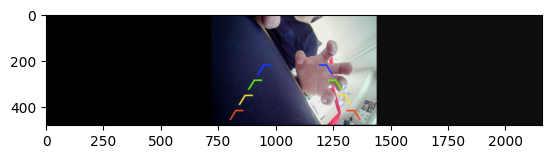

In [19]:
import matplotlib.pyplot as plt
frame = [None, None, None]

for i in range(0,3):
    # Read frame from video source
    ret, frame[i] = cap[i].read()

    # Check if frame is successfully read
    if not ret:
        print("Failed to read frame from video source")
        exit()


#create side by side image of i frames
frame_combined = cv2.hconcat([frame[0], frame[1], frame[2]])

# save image to disk
ts = int(time.time())
filename = f"frame_{ts}.jpg"
#cv2.imwrite(filename, frame_combined)
#print(f"Frame saved to {filename} size:{frame_combined.shape}")


# Display the image
plt.imshow(cv2.cvtColor(frame_combined, cv2.COLOR_BGR2RGB))
plt.show()



In [ ]:
# Release the video capture object and close any open windows
for i in range(0,3):
    cap[i].release()
